In [1]:
martini2= [3.5,1,1.5,1.5,10,4,1,3.5,5,10,3,3]
K_boltzmann = [1.491545229,0.939467267,0.870827266,2.011502542,1.8779708,1.791363503,1.936026703,
               0.768785694,1.642665813,2.042698776,2.044193733,7.968220768]
import numpy as np
np.corrcoef(martini2, K_boltzmann)

array([[1.        , 0.00473037],
       [0.00473037, 1.        ]])

In [4]:
martini_data = [0,0,-10,180,100,180,-20,180,0,0,55,-130]
boltzmann_dist_data = [-42.3,-91.1,-146.5,-141.42,-2.42,-144.46,-143.13,-154.4,63.35,0,
                       -133.58,-147.79]

import numpy as np
print("correlation of distance : martini2 vs boltzmann")
print(np.corrcoef(martini_data, boltzmann_dist_data))



correlation of distance : martini2 vs boltzmann
[[ 1.         -0.18592114]
 [-0.18592114  1.        ]]


In [5]:
boltzmann_dist_data = [-41.57,-91.92397966,-144.504,-141.422328,-119.204,0,-144.9,-143.1312254,
                       -154.4043953,60.56,0,-133.5840577,-147.7950583]
gaussian_dist_data = [-41.57338149,-91.92397966,-146.2497285,-140.1505066,-155,0.563551631,
                      -145.1640485,-140.4858871,-153.5832193,60.56127506,0.65575975,-135.709377,
                      -149.5880126]
print("correlation of distance : gaussian vs boltzmann")
print(np.corrcoef(gaussian_dist_data, boltzmann_dist_data))

correlation of distance : gaussian vs boltzmann
[[1.         0.99102543]
 [0.99102543 1.        ]]


In [3]:
martini_data = [0,0,-10,180,100,180,-20,180,0,0,55,-130,0,180,0,0]
boltzmann_dist_data = [-42.3,-91,-146.5,-141.4,-2.42,-144.5,-143.13,-154.4,63.35,0.44,-133.6,
                       -147.8,-134,134,60,144]
import numpy as np
np.corrcoef(martini_data, boltzmann_dist_data)

array([[1.00000000e+00, 7.37176857e-04],
       [7.37176857e-04, 1.00000000e+00]])

In [4]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy.optimize import curve_fit
dihedral_parameters = pd.DataFrame()
dihedral_parameters_dict = {'Parameter':[],'raw data mean value':[],
                            'raw data mode value gaussian-fitted mode value':[],
                           'Seed value obtained using BOltzmann inversion':[],
                           'K from boltzmann inversion':[]}

In [5]:
dihedral_dict = dict.fromkeys(['BB1_BB2_BB3_ASC1','BB2_BB3_ASC1_ASC2','BB2_BB3_ASC1_ASC4',\
'BB2_BB3_ASC1_ASC4','ASC1_ASC2_ASC3_ASC4','BB1_BB2_BB3_USC1','BB2_BB3_USC1_USC2','BB2_BB3_USC1_USC3','BB1_BB2_BB3_GSC1',\
'BB2_BB3_GSC1_GSC2','BB2_BB3_GSC1_GSC4','GSC1_GSC2_GSC3_GSC4','BB1_BB2_BB3_CSC1','BB1_BB2_BB3_CSC1','BB2_BB3_CSC1_CSC2',
'BB2_BB3_CSC1_CSC2','BB2_BB3_CSC1_CSC3','BB1_BB2_BB3_pBB1','BB2_BB3_pBB1_pBB2','BB3_pBB1_pBB2_pBB3','BB3_pBB1_pBB2_pBB3'
])

In [6]:
df_Hmapped_dihedral_all = pd.read_csv('dihedral_final_allmolecules.csv')

In [7]:
def return_modes_of_data(data):   
    data = data
    n = np.histogram(data)
    count_dict = {}
    for i in range(0,len(n[0])):
        count_dict[n[0][i]] = n[1][i]
    return sorted(count_dict.items()),(sum(data)/len(data))

In [8]:
BB1_BB2_BB3_ASC1_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB1_BB2_BB3_ASC1']
BB2_BB3_ASC1_ASC2_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB2_BB3_ASC1_ASC2']
BB2_BB3_ASC1_ASC4_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB2_BB3_ASC1_ASC4']
ASC1_ASC2_ASC3_ASC4_Hmapped_dihedral_all = df_Hmapped_dihedral_all['ASC1_ASC2_ASC3_ASC4']
BB1_BB2_BB3_USC1_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB1_BB2_BB3_USC1']
BB2_BB3_USC1_USC2_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB2_BB3_USC1_USC2']
BB2_BB3_USC1_USC3_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB2_BB3_USC1_USC3']
BB1_BB2_BB3_GSC1_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB1_BB2_BB3_GSC1']
BB2_BB3_GSC1_GSC2_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB2_BB3_GSC1_GSC2']
BB2_BB3_GSC1_GSC4_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB2_BB3_GSC1_GSC4']
GSC1_GSC2_GSC3_GSC4_Hmapped_dihedral_all = df_Hmapped_dihedral_all['GSC1_GSC2_GSC3_GSC4']
BB1_BB2_BB3_CSC1_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB1_BB2_BB3_CSC1']
BB2_BB3_CSC1_CSC2_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB2_BB3_CSC1_CSC2']
BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB2_BB3_CSC1_CSC3']
BB1_BB2_BB3_pBB1_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB1_BB2_BB3_pBB1']
BB2_BB3_pBB1_pBB2_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB2_BB3_pBB1_pBB2']
BB3_pBB1_pBB2_pBB3_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB3_pBB1_pBB2_pBB3']

In [67]:
BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all

0       139.120
1       141.682
2       140.664
3       146.314
4       140.931
         ...   
9894    140.953
9895    146.948
9896    147.991
9897    141.386
9898    142.261
Name: BB2_BB3_CSC1_CSC3, Length: 9899, dtype: float64

In [9]:
def P2U(p):
     boltzmann = 1.9858285706E-3 # Kcal/K
     T = 298.15 # K
     p_max = p.max()
     return - boltzmann * T * np.log(p / p_max)

In [10]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 1
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

In [11]:
def harmonic_improper_dihedral(theta,theta0,k):
    return k * (theta - theta0) ** 2

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


BB1_BB2_BB3_pBB1_Hmapped_dihedral_all
Mean: Raw data -29.832481462774016
Mode: Raw data -41.57338149077886
Mode: Gauss-fitted -41.57338149077886


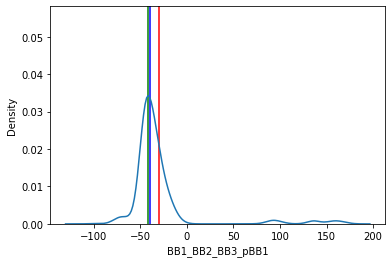

In [12]:
# # Density Plot and Histogram 
# l = []
# for item in BB1_BB2_BB3_pBB1_Hmapped_dihedral_all.values:
# #     l.append(int(item+180))

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB1_BB2_BB3_pBB1_Hmapped_dihedral_all)
xmean = np.mean(BB1_BB2_BB3_pBB1_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt2 = sns.distplot(BB1_BB2_BB3_pBB1_Hmapped_dihedral_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt2.lines[0].get_xdata()
y = plt2.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]
plt2.axvline(xmean,c='red')
plt2.axvline(xmedian,c='blue')
plt2.axvline(xmode,c='green')

# density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB1_BB2_BB3_pBB1_Hmapped_dihedral_all)
x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB1_BB2_BB3_pBB1_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

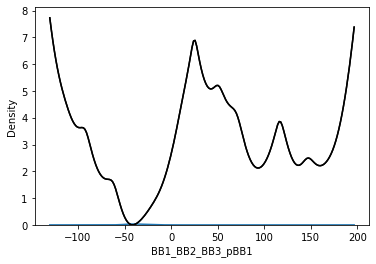

In [48]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 1
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB1_BB2_BB3_pBB1_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)

#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

plt.plot(xdata,U,color='black')

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='black')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-41, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])


dihedral_parameters_dict['Parameter'].append('BB1_BB2_BB3_pBB1')
dihedral_parameters_dict['raw data mean value'].append(xmean)
dihedral_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
dihedral_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
dihedral_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


second mode: 85.34537871691484
BB2_BB3_pBB1_pBB2_Hmapped_dihedral_all
Mean: Raw data -54.19474098393776
Mode: Raw data -91.92397965589518
Mode: Gauss-fitted -91.92397965589518


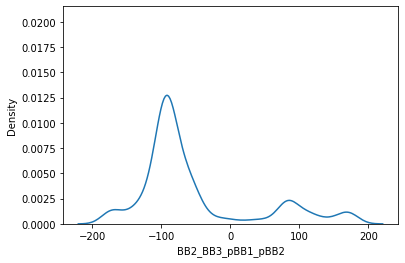

In [28]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_pBB1_pBB2_Hmapped_dihedral_all)
xmean = np.mean(BB2_BB3_pBB1_pBB2_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB2_BB3_pBB1_pBB2_Hmapped_dihedral_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#script for multimodal graphs
x_new = []
y_new = []
for item in x:
    if(item>0 and item<200):
        id = list(x).index(item)
        x_new.append(x[id])
        y_new.append(y[id])
#check the mode in the new partition:
print("second mode:",x_new[np.argmax(y_new)])


# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_pBB1_pBB2_Hmapped_dihedral_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_pBB1_pBB2_Hmapped_dihedral_all)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_pBB1_pBB2_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

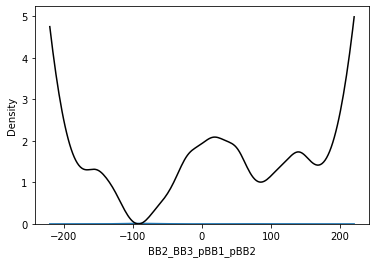

In [29]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 1
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_pBB1_pBB2_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='black')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-91, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

dihedral_parameters_dict['Parameter'].append('BB2_BB3_pBB1_pBB2')
dihedral_parameters_dict['raw data mean value'].append(xmean)
dihedral_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
dihedral_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
dihedral_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


second mode: 39.6966860173051
BB3_pBB1_pBB2_pBB3_Hmapped_dihedral_all
Mean: Raw data -96.1821826447116
Mode: Raw data -146.24972846378182
Mode: Gauss-fitted -146.24972846378182


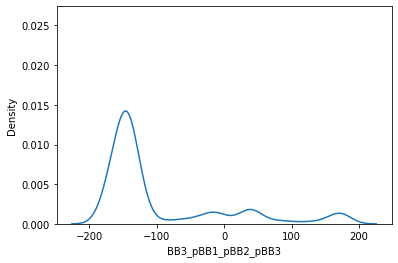

In [30]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_pBB1_pBB2_pBB3_Hmapped_dihedral_all)
xmean = np.mean(BB3_pBB1_pBB2_pBB3_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB3_pBB1_pBB2_pBB3_Hmapped_dihedral_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#script for multimodal graphs
x_new = []
y_new = []
for item in x:
    if(item>0 and item<200):
        id = list(x).index(item)
        x_new.append(x[id])
        y_new.append(y[id])
#check the mode in the new partition:
print("second mode:",x_new[np.argmax(y_new)])

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_pBB1_pBB2_pBB3_Hmapped_dihedral_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_pBB1_pBB2_pBB3_Hmapped_dihedral_all)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_pBB1_pBB2_pBB3_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  -144.50490505144052
parameter K is:  1.112828413768152


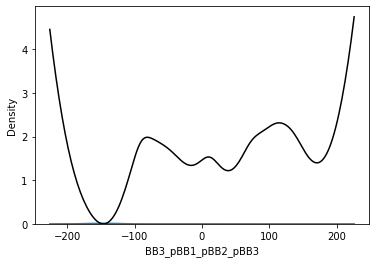

In [31]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 2
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB3_pBB1_pBB2_pBB3_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)

#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)


#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='black')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-146, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

dihedral_parameters_dict['Parameter'].append('BB3_pBB1_pBB2_pBB3')
dihedral_parameters_dict['raw data mean value'].append(xmean)
dihedral_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
dihedral_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
dihedral_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


BB1_BB2_BB3_ASC1_Hmapped_dihedral_all
Mean: Raw data -139.84036821901205
Mode: Raw data -140.15050664257828
Mode: Gauss-fitted -140.15050664257828


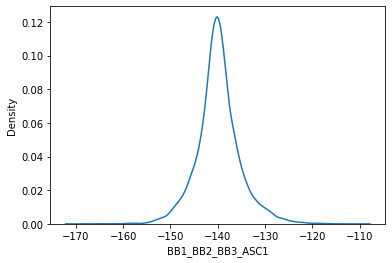

In [32]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB1_BB2_BB3_ASC1_Hmapped_dihedral_all)
xmean = np.mean(BB1_BB2_BB3_ASC1_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
plt = sns.distplot(BB1_BB2_BB3_ASC1_Hmapped_dihedral_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB1_BB2_BB3_ASC1_Hmapped_dihedral_all,bins=10)
# 
# 
# 

# density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB1_BB2_BB3_ASC1_Hmapped_dihedral_all)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB1_BB2_BB3_ASC1_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  -141.42232803874614
parameter K is:  2.011502541855715


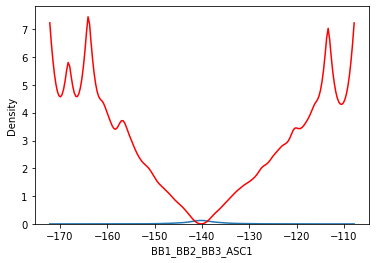

In [33]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 2
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB1_BB2_BB3_ASC1_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)

#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)


#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-140, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

dihedral_parameters_dict['Parameter'].append('BB1_BB2_BB3_ASC1')
dihedral_parameters_dict['raw data mean value'].append(xmean)
dihedral_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
dihedral_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
dihedral_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


second mode: 141.3573922685071
BB2_BB3_ASC1_ASC2_Hmapped_dihedral_all
Mean: Raw data -129.47731528437214
Mode: Raw data -155.75686998524122
Mode: Gauss-fitted -155.75686998524122


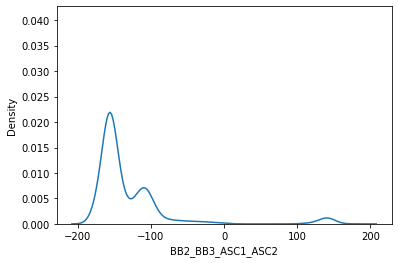

In [34]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_ASC1_ASC2_Hmapped_dihedral_all)
xmean = np.mean(BB2_BB3_ASC1_ASC2_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB2_BB3_ASC1_ASC2_Hmapped_dihedral_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#script for multimodal graphs
x_new = []
y_new = []
for item in x:
    if(item>0 and item<200):
        id = list(x).index(item)
        x_new.append(x[id])
        y_new.append(y[id])
#check the mode in the new partition:
print("second mode:",x_new[np.argmax(y_new)])

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_ASC1_ASC2_Hmapped_dihedral_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_ASC1_ASC2_Hmapped_dihedral_all)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_ASC1_ASC2_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  -119.20466668229717
parameter K is:  2.212037577485315


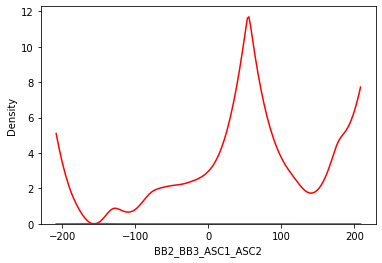

In [53]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 1
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_ASC1_ASC2_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)

#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)


#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-120, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
dihedral_parameters_dict['Parameter'].append('BB2_BB3_ASC1_ASC2')
dihedral_parameters_dict['raw data mean value'].append(xmean)
dihedral_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
dihedral_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
dihedral_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


IndexError: list index out of range

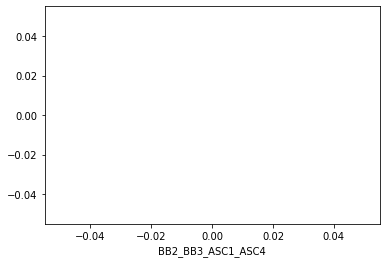

In [36]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_ASC1_ASC4_Hmapped_dihedral_all)
xmean = np.mean(BB2_BB3_ASC1_ASC4_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB2_BB3_ASC1_ASC4_Hmapped_dihedral_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_ASC1_ASC4_Hmapped_dihedral_all,bins=10)
# 
# 
# 

# density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_ASC1_ASC4_Hmapped_dihedral_all)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_ASC1_ASC4_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


In [65]:
BB2_BB3_ASC1_ASC4_Hmapped_dihedral_all_BB3

NameError: name 'BB2_BB3_ASC1_ASC4_Hmapped_dihedral_all_BB3' is not defined

IndexError: list index out of range

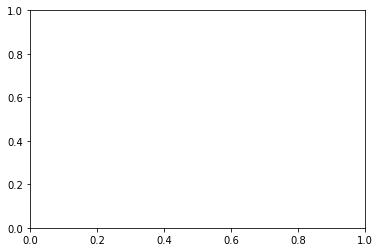

In [37]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 2
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_ASC1_ASC4_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)

#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[0, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
dihedral_parameters_dict['Parameter'].append('BB2_BB3_ASC1_ASC4')
dihedral_parameters_dict['raw data mean value'].append(xmean)
dihedral_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
dihedral_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
dihedral_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC1_ASC2_ASC3_ASC4_Hmapped_dihedral_all
Mean: Raw data 0.38615587433074045
Mode: Raw data 0.5635516314740201
Mode: Gauss-fitted 0.5635516314740201


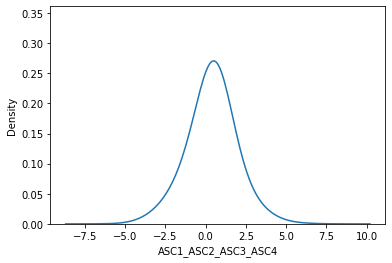

In [38]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_ASC2_ASC3_ASC4_Hmapped_dihedral_all)
xmean = np.mean(ASC1_ASC2_ASC3_ASC4_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(ASC1_ASC2_ASC3_ASC4_Hmapped_dihedral_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC1_ASC2_ASC3_ASC4_Hmapped_dihedral_all,bins=10)
# 
# 
# 

# density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_ASC2_ASC3_ASC4_Hmapped_dihedral_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC1_ASC2_ASC3_ASC4_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  -2.4182233408443663
parameter K is:  1.87797078731193


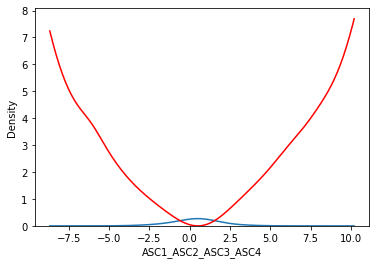

In [57]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 1
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(ASC1_ASC2_ASC3_ASC4_Hmapped_dihedral_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)

#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='red')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-1, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
dihedral_parameters_dict['Parameter'].append('ASC1_ASC2_ASC3_ASC4')
dihedral_parameters_dict['raw data mean value'].append(xmean)
dihedral_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
dihedral_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
dihedral_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB1_BB2_BB3_USC1_Hmapped_dihedral_all
Mean: Raw data -133.12684604505506
Mode: Raw data -134.25317685623992
Mode: Gauss-fitted -134.25317685623992


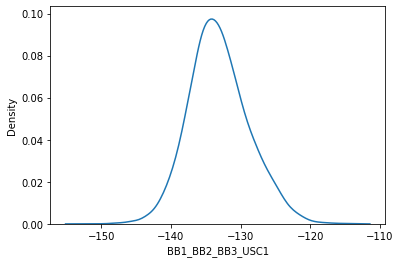

In [40]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB1_BB2_BB3_USC1_Hmapped_dihedral_all)
xmean = np.mean(BB1_BB2_BB3_USC1_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB1_BB2_BB3_USC1_Hmapped_dihedral_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB1_BB2_BB3_USC1_Hmapped_dihedral_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB1_BB2_BB3_USC1_Hmapped_dihedral_all,bw=0.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB1_BB2_BB3_USC1_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

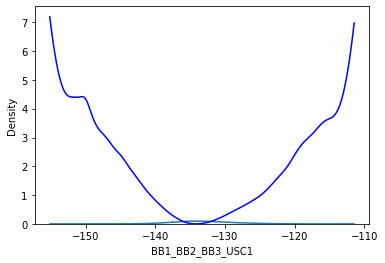

In [41]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 2
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB1_BB2_BB3_USC1_Hmapped_dihedral_all,bw=0.2)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)

#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-134, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
dihedral_parameters_dict['Parameter'].append('BB1_BB2_BB3_USC1')
dihedral_parameters_dict['raw data mean value'].append(xmean)
dihedral_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
dihedral_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
dihedral_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


second mode: 2.856457351910109
BB2_BB3_USC1_USC2_Hmapped_dihedral_all
Mean: Raw data -138.47805081321346
Mode: Raw data -145.16404847820246
Mode: Gauss-fitted -145.16404847820246


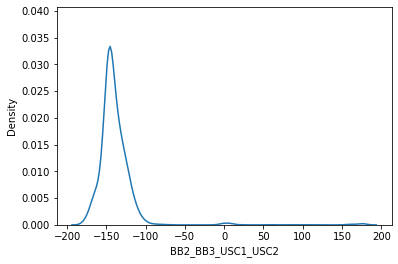

In [42]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_USC1_USC2_Hmapped_dihedral_all)
xmean = np.mean(BB2_BB3_USC1_USC2_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
plt = sns.distplot(BB2_BB3_USC1_USC2_Hmapped_dihedral_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#script for multimodal graphs
x_new = []
y_new = []
for item in x:
    if(item>0 and item<200):
        id = list(x).index(item)
        x_new.append(x[id])
        y_new.append(y[id])
#check the mode in the new partition:
print("second mode:",x_new[np.argmax(y_new)])

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_USC1_USC2_Hmapped_dihedral_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_USC1_USC2_Hmapped_dihedral_all)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_USC1_USC2_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  -144.94750084680948
parameter K is:  2.866537402360512


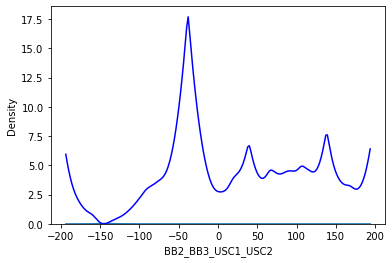

In [43]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 1
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_USC1_USC2_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)

#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-145, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
dihedral_parameters_dict['Parameter'].append('BB2_BB3_USC1_USC2')
dihedral_parameters_dict['raw data mean value'].append(xmean)
dihedral_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
dihedral_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
dihedral_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


BB2_BB3_USC1_USC3_Hmapped_dihedral_all
Mean: Raw data 137.50482796242045
Mode: Raw data 134.58390835432908
Mode: Gauss-fitted 134.58390835432908


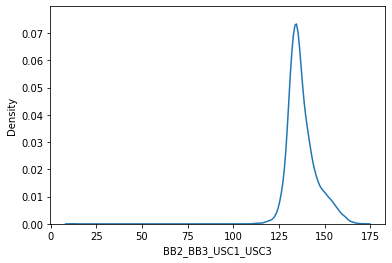

In [44]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_USC1_USC3_Hmapped_dihedral_all)
xmean = np.mean(BB2_BB3_USC1_USC3_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB2_BB3_USC1_USC3_Hmapped_dihedral_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_USC1_USC3_Hmapped_dihedral_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_USC1_USC3_Hmapped_dihedral_all)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_USC1_USC3_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

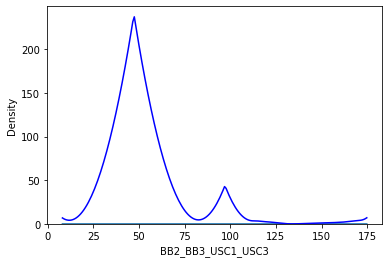

In [63]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 6
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_USC1_USC3_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)

#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='blue')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[200, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
dihedral_parameters_dict['Parameter'].append('BB2_BB3_USC1_USC3')
dihedral_parameters_dict['raw data mean value'].append(xmean)
dihedral_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
dihedral_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
dihedral_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB1_BB2_BB3_GSC1_Hmapped_dihedral_all
Mean: Raw data -139.56598939286795
Mode: Raw data -140.48588714818808
Mode: Gauss-fitted -140.48588714818808


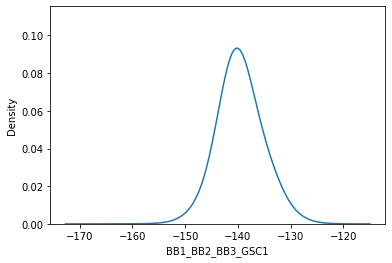

In [46]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB1_BB2_BB3_GSC1_Hmapped_dihedral_all)
xmean = np.mean(BB1_BB2_BB3_GSC1_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB1_BB2_BB3_GSC1_Hmapped_dihedral_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB1_BB2_BB3_GSC1_Hmapped_dihedral_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB1_BB2_BB3_GSC1_Hmapped_dihedral_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB1_BB2_BB3_GSC1_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  -143.13122535354918
parameter K is:  1.9360267027438285


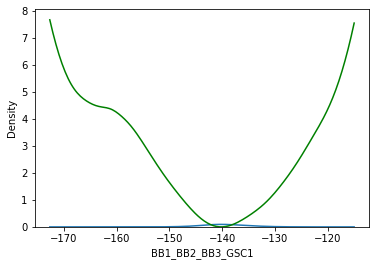

In [47]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 2
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB1_BB2_BB3_GSC1_Hmapped_dihedral_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-140, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
dihedral_parameters_dict['Parameter'].append('BB1_BB2_BB3_GSC1')
dihedral_parameters_dict['raw data mean value'].append(xmean)
dihedral_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
dihedral_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
dihedral_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


second mode: 98.72179227457681
third mode: 165.36839911043594
BB2_BB3_GSC1_GSC2_Hmapped_dihedral_all
Mean: Raw data -75.70583149813112
Mode: Raw data -153.5832193183183
Mode: Gauss-fitted -153.5832193183183


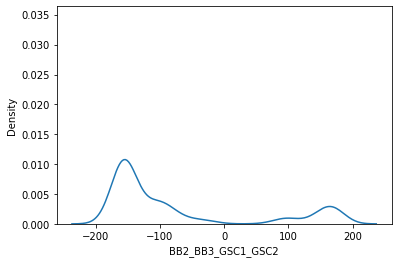

In [14]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_GSC1_GSC2_Hmapped_dihedral_all)
xmean = np.mean(BB2_BB3_GSC1_GSC2_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB2_BB3_GSC1_GSC2_Hmapped_dihedral_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#script for multimodal graphs
x_new = []
y_new = []
for item in x:
    if(item>0 and item<100):
        id = list(x).index(item)
        x_new.append(x[id])
        y_new.append(y[id])
#check the mode in the new partition:
print("second mode:",x_new[np.argmax(y_new)])

#script for multimodal graphs
x_new = []
y_new = []
for item in x:
    if(item>100 and item<200):
        id = list(x).index(item)
        x_new.append(x[id])
        y_new.append(y[id])
#check the mode in the new partition:
print("third mode:",x_new[np.argmax(y_new)])

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_GSC1_GSC2_Hmapped_dihedral_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_GSC1_GSC2_Hmapped_dihedral_all)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_GSC1_GSC2_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  -154.0050472329529
parameter K is:  1.0815209181646916


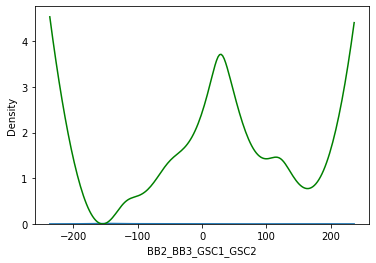

In [15]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 1
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_GSC1_GSC2_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-153, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
dihedral_parameters_dict['Parameter'].append('BB2_BB3_GSC1_GSC2')
dihedral_parameters_dict['raw data mean value'].append(xmean)
dihedral_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
dihedral_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
dihedral_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


second mode: -86.81146088586112
third mode: 60.56127506321198
BB2_BB3_GSC1_GSC4_Hmapped_dihedral_all
Mean: Raw data 84.4317316900697
Mode: Raw data 60.56127506321198
Mode: Gauss-fitted 60.56127506321198


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.7 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


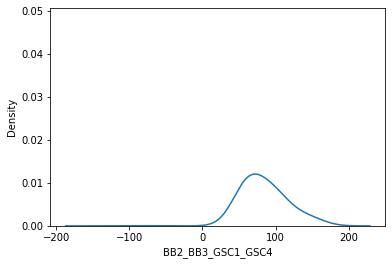

In [16]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_GSC1_GSC4_Hmapped_dihedral_all)
xmean = np.mean(BB2_BB3_GSC1_GSC4_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB2_BB3_GSC1_GSC4_Hmapped_dihedral_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#script for multimodal graphs
x_new = []
y_new = []
for item in x:
    if(item>-200 and item<0):
        id = list(x).index(item)
        x_new.append(x[id])
        y_new.append(y[id])
#check the mode in the new partition:
print("second mode:",x_new[np.argmax(y_new)])

#script for multimodal graphs
x_new = []
y_new = []
for item in x:
    if(item>0 and item<200):
        id = list(x).index(item)
        x_new.append(x[id])
        y_new.append(y[id])
#check the mode in the new partition:
print("third mode:",x_new[np.argmax(y_new)])

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_GSC1_GSC4_Hmapped_dihedral_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_GSC1_GSC4_Hmapped_dihedral_all,bw=0.7)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_GSC1_GSC4_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


In [70]:
BB2_BB3_CSC1_CSC2_Hmapped_dihedral_all

0      -152.770
1      -148.030
2      -150.675
3      -149.784
4      -150.404
         ...   
9894   -155.243
9895   -149.227
9896   -147.897
9897   -154.337
9898   -154.078
Name: BB2_BB3_CSC1_CSC2, Length: 9899, dtype: float64

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.7 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

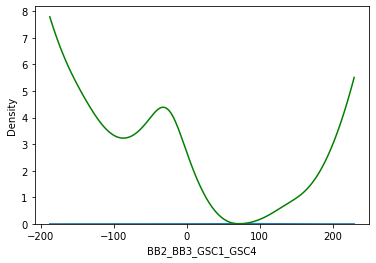

In [64]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 2
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_GSC1_GSC4_Hmapped_dihedral_all,bw=0.7)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[61, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
dihedral_parameters_dict['Parameter'].append('BB2_BB3_GSC1_GSC4')
dihedral_parameters_dict['raw data mean value'].append(xmean)
dihedral_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
dihedral_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
dihedral_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC1_GSC2_GSC3_GSC4_Hmapped_dihedral_all
Mean: Raw data 0.359935448025053
Mode: Raw data 0.6557597500539698
Mode: Gauss-fitted 0.6557597500539698


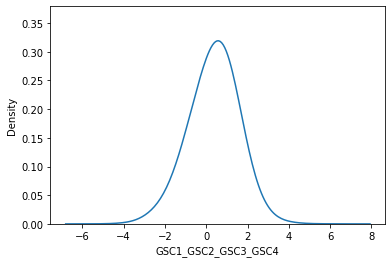

In [18]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_GSC2_GSC3_GSC4_Hmapped_dihedral_all)
xmean = np.mean(GSC1_GSC2_GSC3_GSC4_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
plt = sns.distplot(GSC1_GSC2_GSC3_GSC4_Hmapped_dihedral_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC1_GSC2_GSC3_GSC4_Hmapped_dihedral_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_GSC2_GSC3_GSC4_Hmapped_dihedral_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC1_GSC2_GSC3_GSC4_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.43925903892791046
parameter K is:  2.0427041417897236


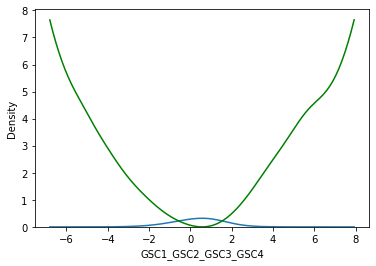

In [19]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 1
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(GSC1_GSC2_GSC3_GSC4_Hmapped_dihedral_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='green')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[0, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
dihedral_parameters_dict['Parameter'].append('GSC1_GSC2_GSC3_GSC4')
dihedral_parameters_dict['raw data mean value'].append(xmean)
dihedral_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
dihedral_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
dihedral_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB1_BB2_BB3_CSC1_Hmapped_dihedral_all
Mean: Raw data -135.88503959995958
Mode: Raw data -135.70937696985146
Mode: Gauss-fitted -135.70937696985146


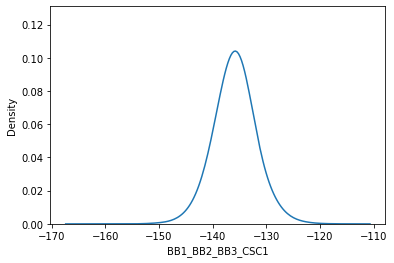

In [20]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB1_BB2_BB3_CSC1_Hmapped_dihedral_all)
xmean = np.mean(BB1_BB2_BB3_CSC1_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB1_BB2_BB3_CSC1_Hmapped_dihedral_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB1_BB2_BB3_CSC1_Hmapped_dihedral_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB1_BB2_BB3_CSC1_Hmapped_dihedral_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB1_BB2_BB3_CSC1_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


## 

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  -133.58405773618742
parameter K is:  2.044193732578837


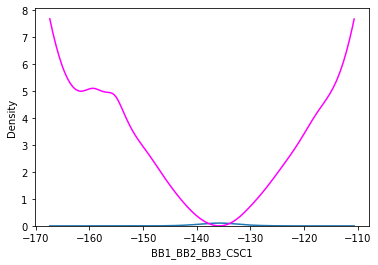

In [21]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 2
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB1_BB2_BB3_CSC1_Hmapped_dihedral_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-135, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
dihedral_parameters_dict['Parameter'].append('BB1_BB2_BB3_CSC1')
dihedral_parameters_dict['raw data mean value'].append(xmean)
dihedral_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
dihedral_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
dihedral_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


BB2_BB3_CSC1_CSC2_Hmapped_dihedral_all
Mean: Raw data -150.1974273158905
Mode: Raw data -149.58801258886047
Mode: Gauss-fitted -149.58801258886047


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


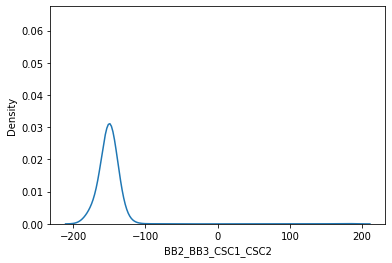

In [22]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_CSC1_CSC2_Hmapped_dihedral_all)
xmean = np.mean(BB2_BB3_CSC1_CSC2_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB2_BB3_CSC1_CSC2_Hmapped_dihedral_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_CSC1_CSC2_Hmapped_dihedral_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_CSC1_CSC2_Hmapped_dihedral_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_CSC1_CSC2_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  -147.7950583439346
parameter K is:  7.968220767694025


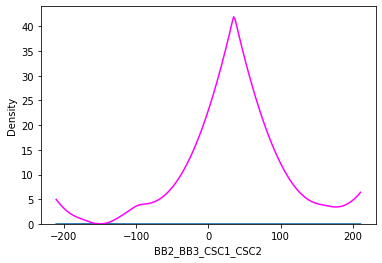

In [23]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 6
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_CSC1_CSC2_Hmapped_dihedral_all,bw=0.5)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-149, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])
dihedral_parameters_dict['Parameter'].append('BB2_BB3_CSC1_CSC2')
dihedral_parameters_dict['raw data mean value'].append(xmean)
dihedral_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
dihedral_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
dihedral_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all
Mean: Raw data 144.37203040711182
Mode: Raw data 144.30124823996735
Mode: Gauss-fitted 144.30124823996735


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


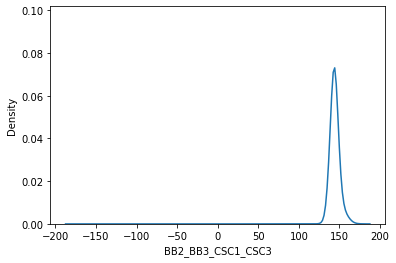

In [24]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all)
xmean = np.mean(BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

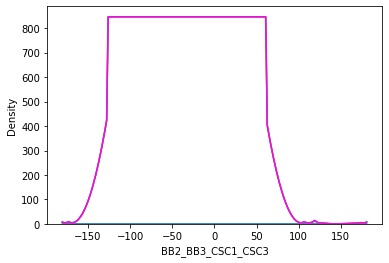

In [25]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 1
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()
#calculate energy
U = P2U(ydata)
# print(U)

if(U.max() == float('inf')):
    U2 = U.copy()
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

plt.plot(xdata,U)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[144, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

dihedral_parameters_dict['Parameter'].append('BB2_BB3_CSC1_CSC3')
dihedral_parameters_dict['raw data mean value'].append(xmean)
dihedral_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
dihedral_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
dihedral_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all
Mean: Raw data 144.37203040711182
Mode: Raw data 144.30124823996735
Mode: Gauss-fitted 144.30124823996735


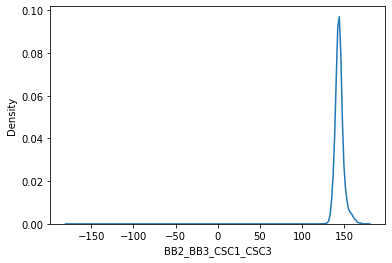

In [26]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all)
xmean = np.mean(BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

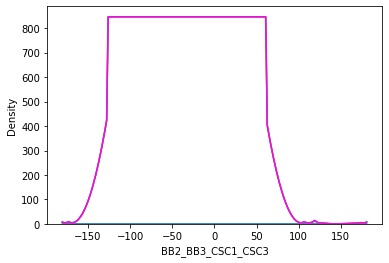

In [27]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 1
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()
#calculate energy
U = P2U(ydata)
# print(U)

if(U.max() == float('inf')):
    U2 = U.copy()
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

plt.plot(xdata,U)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U,color='magenta')

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[144, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

dihedral_parameters_dict['Parameter'].append('BB2_BB3_CSC1_CSC3')
dihedral_parameters_dict['raw data mean value'].append(xmean)
dihedral_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
dihedral_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
dihedral_parameters_dict['K from boltzmann inversion'].append(params[1])

In [373]:
dihedral_parameters['Parameter'] = dihedral_parameters_dict['Parameter']
dihedral_parameters['raw data mean value'] = dihedral_parameters_dict['raw data mean value']
dihedral_parameters['raw data mode value gaussian-fitted mode value'] = dihedral_parameters_dict['raw data mode value gaussian-fitted mode value']
dihedral_parameters['Seed value obtained using BOltzmann inversion'] = dihedral_parameters_dict['Seed value obtained using BOltzmann inversion']
dihedral_parameters['K from boltzmann inversion'] = dihedral_parameters_dict['K from boltzmann inversion']
dihedral_parameters.head()
dihedral_parameters.to_csv("sirna_parameters_dihedrals.csv")